In [1]:
import os
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 150
# rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'

In [3]:
# base directory for logs
logs_dir = '../embeddings/PBMC_CITEseq/'
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'VAE':
            # save log data
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['elbo_train'].values
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)


Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 23680.76it/s]


In [4]:
logs_df

,Quality,Replicate,Fraction,Method,Loss curve
0,Q0.001,rep0,0.001,VAE,"[[9.094229698181152], [8.974685668945312], [8...."
1,Q0.001,rep0,0.002,VAE,"[[9.878859519958496], [9.57608413696289], [9.3..."
2,Q0.001,rep0,0.005,VAE,"[[10.756050109863281], [10.412337303161621], [..."
3,Q0.001,rep0,0.010,VAE,"[[9.792098999023438], [9.352255821228027], [8...."
4,Q0.001,rep0,0.022,VAE,"[[9.364726066589355], [8.354586601257324], [8...."
...,...,...,...,...,...
95,Q1.000,rep0,0.046,VAE,"[[568.9525756835938], [422.4013671875], [404.5..."
96,Q1.000,rep0,0.100,VAE,"[[479.7865905761719], [402.9935302734375], [40..."
97,Q1.000,rep0,0.215,VAE,"[[450.83612060546875], [401.58868408203125], [..."
98,Q1.000,rep0,0.464,VAE,"[[431.10595703125], [412.66058349609375], [405..."


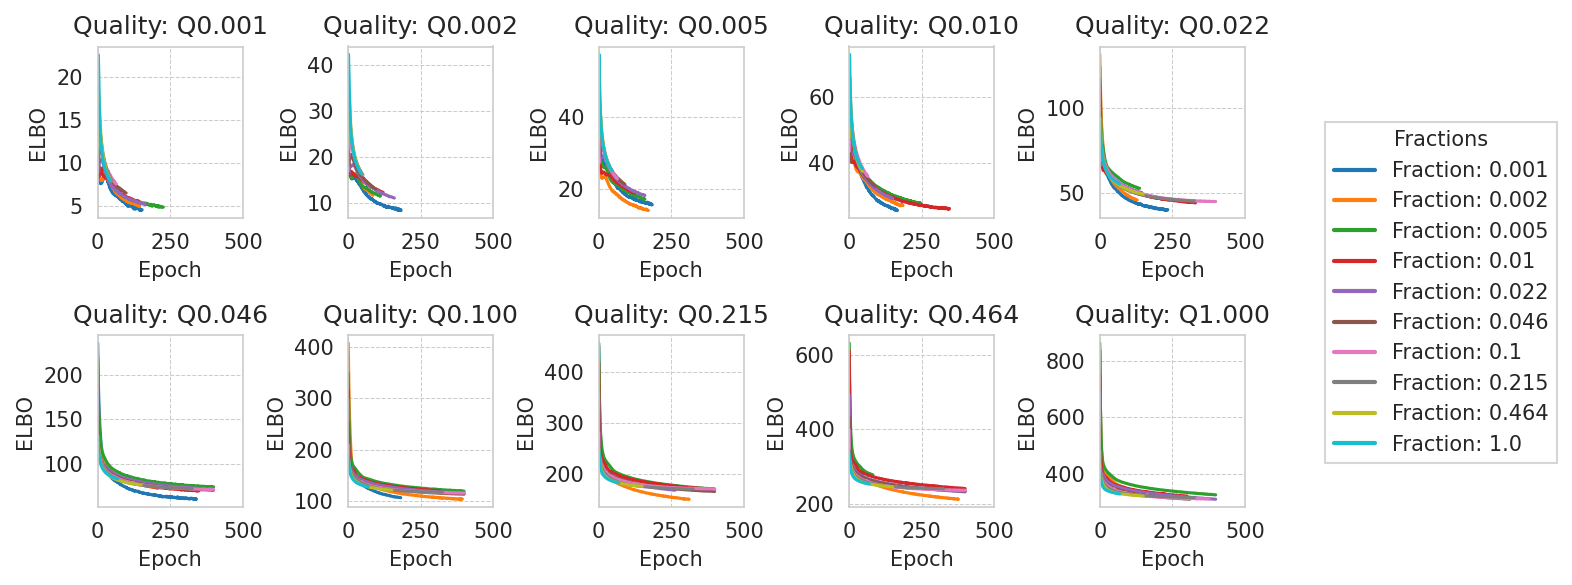

In [5]:
qualities = logs_df['Quality'].unique()
fractions = logs_df['Fraction'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))

fig, axes = plt.subplots(2, 5, figsize=(10, 4), dpi=150, sharex=False, sharey=False)

# ensure axes is iterable even for 1 subplot
if len(qualities) == 1:
    axes = [axes]

# create a dictionary to collect labels for the legend
legend_items = {}

for i, quality in enumerate(qualities):
    ax = axes.flat[i]
    subset = logs_df[logs_df['Quality'] == quality]
    
    for j, row in subset.iterrows():
        # plot with consistent color cycling
        color = colors[fractions.tolist().index(row['Fraction'])]
        ax.plot(row['Loss curve'], color=color)
        legend_items[f"Fraction: {row['Fraction']}"] = color  # collect label & color
    
    ax.set_xlim(0, 500)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('ELBO')
    ax.set_title(f'Quality: {quality}')

# add a single legend to the right
handles = [plt.Line2D([0], [0], color=color, lw=2) for _, color in legend_items.items()]
labels = legend_items.keys()

fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), title="Fractions")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # adjust layout to fit legend
plt.show()

In [6]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'nanoTxformer':
            # save log data
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['train_losses']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 18529.68it/s]


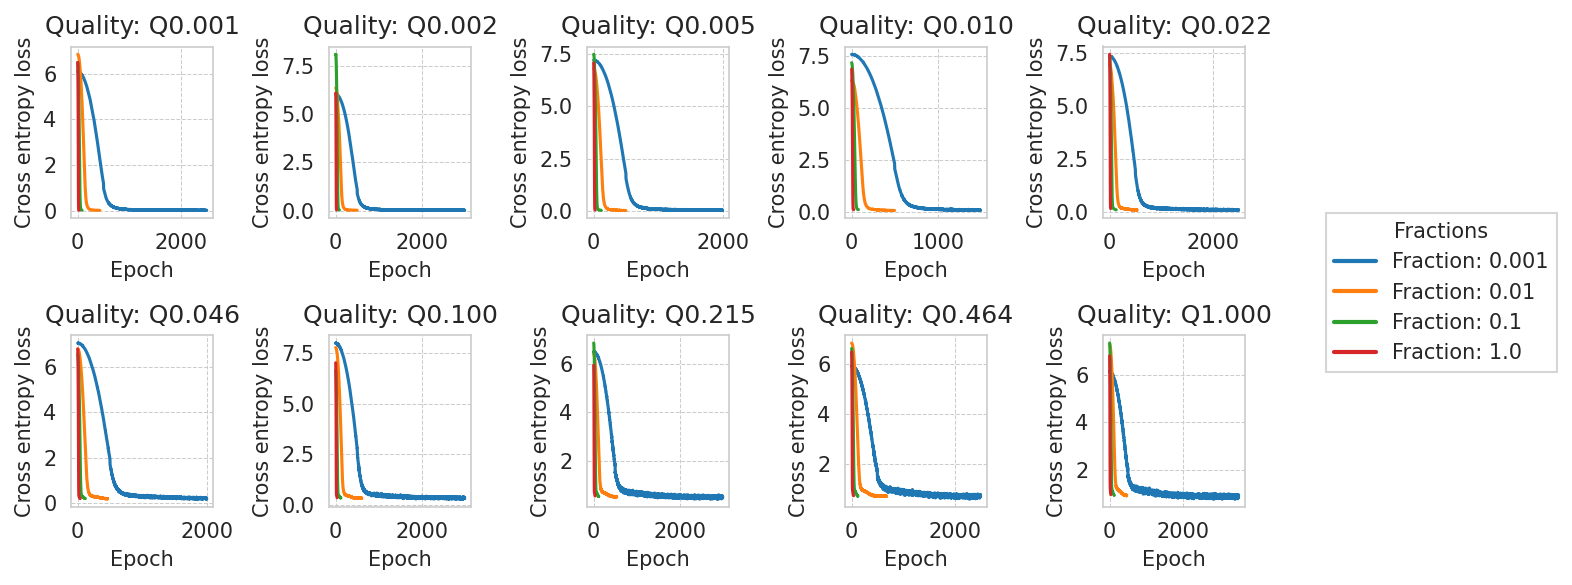

In [7]:
qualities = logs_df['Quality'].unique()
fractions = logs_df['Fraction'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))

fig, axes = plt.subplots(2, 5, figsize=(10, 4), dpi=150, sharex=False, sharey=False)

# ensure axes is iterable even for 1 subplot
if len(qualities) == 1:
    axes = [axes]

# create a dictionary to collect labels for the legend
legend_items = {}

for i, quality in enumerate(qualities):
    ax = axes.flat[i]
    subset = logs_df[logs_df['Quality'] == quality]
    
    for j, row in subset.iterrows():
        # plot with consistent color cycling
        color = colors[fractions.tolist().index(row['Fraction'])]
        ax.plot(row['Loss curve'], color=color)
        legend_items[f"Fraction: {row['Fraction']}"] = color  # collect label & color
    
    # ax.set_xlim(0, 500)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Cross entropy loss')
    ax.set_title(f'Quality: {quality}')

# add a single legend to the right
handles = [plt.Line2D([0], [0], color=color, lw=2) for _, color in legend_items.items()]
labels = legend_items.keys()

fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05, 0.5), title="Fractions")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # adjust layout to fit legend
plt.show()

In [8]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'PCA':
            # save log data
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Variance explained': log_data['variance_explained']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q1.000_rep0: 100%|██████████| 59/59 [00:00<00:00, 24335.13it/s]


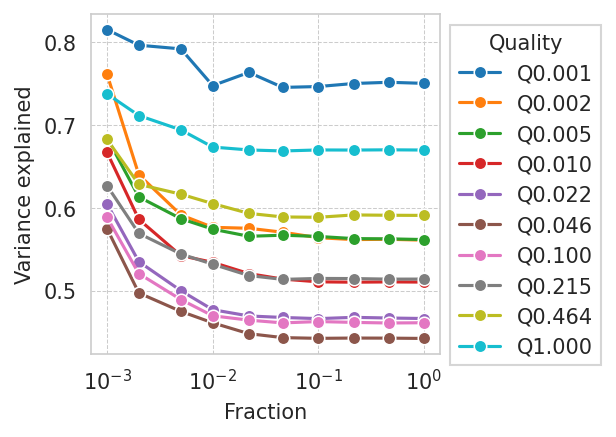

In [9]:
plt.figure(figsize=(3, 3), dpi=150)
ax = sns.lineplot(logs_df, x='Fraction', y='Variance explained', 
             hue='Quality', marker='o')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Quality")
plt.xscale('log')
# plt.yscale('log')